In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import drive


import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/My Drive/

data_dir = '/content/gdrive/My Drive/Waste Dataset - Pre-processing (image resizing 100x100 (Aspect Ratio))/'


#/////////////////////////////////////////////////////////////////////

Name=[]
for file in os.listdir(data_dir):
    Name+=[file]
    
print(Name)
print(len(Name))

#/////////////////////////////////////////////////////////////////////


Mounted at /content/gdrive
/content/gdrive/My Drive
['Waste 1 - Clear Bottle', 'Waste 2 - Coloured Bottle', 'Waste 3 - Clear Plastic Bag', 'Waste 4 - Coloured Plastic Bag']
4


In [ ]:
dataset=[]
count=0
for file in os.listdir(data_dir):
    path=os.path.join(data_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im))
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
    count=count+1

n=len(dataset)
print(n)

997


In [ ]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

    #///////////////////////////////////////////////////////

num=[]
for i in range(n):
    num+=[i]
random.shuffle(num)
print(num[0:5])

#//////////////////////////////////////////////////////////
data,labels=zip(*dataset)
data=np.array(data)
labels=np.array(labels)

train=data[num[0:(n//10)*8]]
trainlabel=labels[num[0:(n//10)*8]]

test=data[num[(n//10)*8:]]
testlabel=labels[num[(n//10)*8:]]


#////////////////////////////////////////////////////////////
trainlabel2=to_categorical(trainlabel)

trainx,testx,trainy,testy=train_test_split(train,trainlabel2,test_size=0.2,random_state=44)

#////////////////////////////////////////////////////////////////
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

[394, 783, 177, 978, 947]
(633, 100, 100, 3)
(159, 100, 100, 3)
(633, 4)
(159, 4)


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(100,100,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 256)       2

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
# two training variables and two testing variables, trainx and trainy and testx and testy. How do i put them in here?
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq="epoch")
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=30, verbose=1, mode='auto')
hist = model.fit(datagen.flow(trainx, trainy), batch_size=8, validation_data=(testx, testy), epochs=30,callbacks=[checkpoint,early])

Epoch 1/30
20/20 [==============================] - 251s 13s/step - loss: 1.5185 - accuracy: 0.3049 - val_loss: 1.3902 - val_accuracy: 0.2579

Epoch 00001: val_accuracy improved from -inf to 0.25786, saving model to vgg16_1.h5
Epoch 2/30
20/20 [==============================] - 254s 13s/step - loss: 1.3649 - accuracy: 0.2938 - val_loss: 1.4161 - val_accuracy: 0.2579

Epoch 00002: val_accuracy did not improve from 0.25786
Epoch 3/30
20/20 [==============================] - 251s 13s/step - loss: 1.3659 - accuracy: 0.2765 - val_loss: 1.3980 - val_accuracy: 0.2579

Epoch 00003: val_accuracy did not improve from 0.25786
Epoch 4/30
20/20 [==============================] - 251s 13s/step - loss: 1.3646 - accuracy: 0.2954 - val_loss: 1.4095 - val_accuracy: 0.2579

Epoch 00004: val_accuracy did not improve from 0.25786
Epoch 5/30
20/20 [==============================] - 251s 13s/step - loss: 1.3683 - accuracy: 0.3065 - val_loss: 1.3977 - val_accuracy: 0.2579

Epoch 00005: val_accuracy did not im

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.26      1.00      0.41        41
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        42

    accuracy                           0.26       159
   macro avg       0.06      0.25      0.10       159
weighted avg       0.07      0.26      0.11       159



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


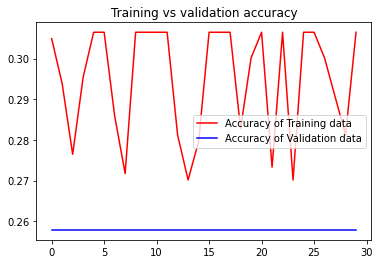

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = hist.history['accuracy']
value_acc = hist.history['val_accuracy']
get_loss = hist.history['loss']
validation_loss = hist.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

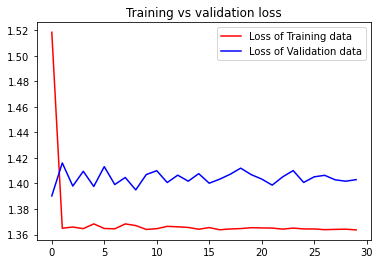

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

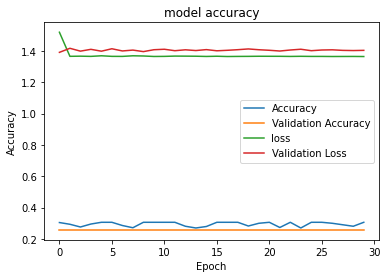

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()